# Questions that I will solve:
1. Which company has received the most awards overall in most of the years?
2. Which company has received the most awards in a single year?
3. Which game has received the most awards in an event?
4. Which country received the most awards at an event?

# Libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

# Importing and Selecting Data

In [69]:
df = pd.read_csv('../input/the-game-awards/the_game_awards.csv', sep=',', decimal=b'.', encoding='UTF-8')
winners = df.loc[df['winner'] == 1]

In [70]:
df.head(2)

,year,category,nominee,company,winner,voted
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1,jury
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0,jury


# Solving ...
## 1. Which company has received the most awards overall in most of the years?
To solve that question, using winners dataframe and ignoring any NaN value present, I will look for the company that got many awards as possible.

In [71]:
df_winners_company = pd.DataFrame(df['company'].value_counts())
df_winners_company = df_winners_company.reset_index()
df_winners_company.columns = ['Company', 'Awards']

To see the results, I will be plotting the first 10 companies:

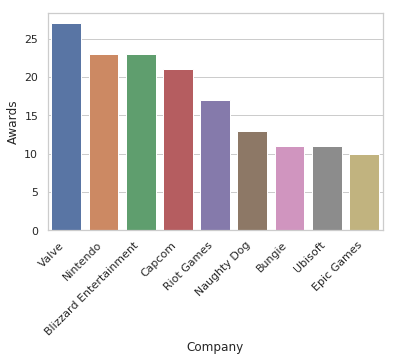

In [72]:
sns.set(style="whitegrid")
plot1 = sns.barplot(x='Company', y='Awards', data=df_winners_company[0:9]);
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, ha='right');

In [73]:
df_winners_company[0:9]

,Company,Awards
0,Valve,27
1,Nintendo,23
2,Blizzard Entertainment,23
3,Capcom,21
4,Riot Games,17
5,Naughty Dog,13
6,Bungie,11
7,Ubisoft,11
8,Epic Games,10


So here you can see that **Valve** won most of the awards from 2014 to 2019.

## 2. Which company has received the most awards in a single year?

In [74]:
for year in winners['year'].unique():
    # Get the data only for one year in specific
    winners_in_year = winners.loc[winners['year'] == year]
    # Get the value count for the companies in that year
    winners_companies = pd.DataFrame(winners_in_year['company'].value_counts())
    winners_companies = winners_companies.reset_index()
    winners_companies.columns = ['Company', 'Awards']
    # LOOP WITH CONDITIONAL - There is the same quantity of awards in the same year?
    for i in range(0,len(winners_companies)):
        # BREAK CONDITION - If we have one winner and the others companies has 
        # less than your awards then break break the loop
        if i != 0 and (winners_companies.loc[0,'Awards'] > winners_companies.loc[i,'Awards']):
            break
        # Print results
        print('In ',year,'the company that got most awards was ',winners_companies.loc[i,'Company'],' with ',winners_companies.loc[i,'Awards'],' awards.')

In  2014 the company that got most awards was  Ubisoft Montpellier  with  2  awards.
In  2014 the company that got most awards was  Nintendo EAD  with  2  awards.
In  2014 the company that got most awards was  BioWare  with  2  awards.
In  2015 the company that got most awards was  Nintendo  with  3  awards.
In  2016 the company that got most awards was  Blizzard Entertainment  with  3  awards.
In  2017 the company that got most awards was  StudioMDHR  with  3  awards.
In  2017 the company that got most awards was  Nintendo  with  3  awards.
In  2018 the company that got most awards was  Rockstar Games  with  3  awards.
In  2018 the company that got most awards was  SIE Santa Monica Studio/Sony Interactive Entertainment  with  3  awards.
In  2019 the company that got most awards was  ZA/UM  with  4  awards.


Analyzing the text above, it is possible to see that ZA/UM is the company with more awards in a year with **4 awards in 2019**.

## 3. Which game has received the most awards in an event?
Using the same loop that I presented in the previous question, now for I will do the Nominee column. 

**Note**: I'm considering an event equal to a year.

In [75]:
for year in winners['year'].unique():
    # Get the data only for one year in specific
    winners_in_year = winners.loc[winners['year'] == year]
    # Get the value count for the companies in that year
    winners_nominee = pd.DataFrame(winners_in_year['nominee'].value_counts())
    winners_nominee = winners_nominee.reset_index()
    winners_nominee.columns = ['Nominee', 'Awards']
    # LOOP WITH CONDITIONAL - There is the same quantity of awards in the same year?
    for i in range(0,len(winners_nominee)):
        # BREAK CONDITION - If we have one winner and the others companies has less than your awards then break break the loop
        if i != 0 and (winners_nominee.loc[0,'Awards'] > winners_nominee.loc[i,'Awards']):
            break
        # Print results
        print('In ',year,'the game that got most awards was ',winners_nominee.loc[i,'Nominee'],' with ',winners_nominee.loc[i,'Awards'],' awards.')

In  2014 the game that got most awards was  Mario Kart 8  with  2  awards.
In  2014 the game that got most awards was  Dragon Age: Inquisition  with  2  awards.
In  2014 the game that got most awards was  Valiant Hearts: The Great War  with  2  awards.
In  2014 the game that got most awards was  Destiny  with  2  awards.
In  2015 the game that got most awards was  Splatoon  with  2  awards.
In  2015 the game that got most awards was  Metal Gear Solid V: The Phantom Pain  with  2  awards.
In  2015 the game that got most awards was  The Witcher 3: Wild Hunt  with  2  awards.
In  2015 the game that got most awards was  Rocket League  with  2  awards.
In  2016 the game that got most awards was  Overwatch  with  3  awards.
In  2017 the game that got most awards was  Cuphead  with  3  awards.
In  2017 the game that got most awards was  The Legend of Zelda: Breath of the Wild  with  3  awards.
In  2018 the game that got most awards was  Red Dead Redemption 2  with  3  awards.
In  2018 the gam

So by this analysis, it is possible to see that **Disco Elysium** got most awards in an event in 2019.

**NOTE**: I ignored in my code the categories related to companies/gamers most because the code itself would take out from the account.

## 4. Which country received the most awards at an event?
Considering that an **event** is equal to **year** and the answer for question 2, I will create a dataset specific for this question where I put **manually** the country for that specific companies, showing the answer for this question.

In [76]:
# Define previously the coluns manually
event = [2014,2014,2014,2015,2016,2017,2017,2018,2018,2019]
company = ['Ubisoft Montpellier','Nintendo EAD','BioWare','Nintendo','Blizzard Entertainment','StudioMDHR','Nintendo','Rockstar Games',
           'SIE Santa Monica Studio/Sony Interactive Entertainment','ZA/UM']
country = ['France','Japan','Canada','Japan','USA','Canada','Japan','USA','USA','England']
awards = [2,2,2,3,3,3,3,3,3,4]

# Create the dataframe
data = pd.DataFrame(list(zip(event,company,country,awards)),columns=['event','company','country','awards'])

In [77]:
data.groupby(['event', 'country']).size()

event  country
2014   Canada     1
       France     1
       Japan      1
2015   Japan      1
2016   USA        1
2017   Canada     1
       Japan      1
2018   USA        2
2019   England    1
dtype: int64

By this line code above and previous knowledge, we can see that the only way to a country beat England is **USA in 2018** that was the only country with more than one company to win a award. Looking for the question 2 answer we can see that USA in 2018 had **6 Awards**, meaning that it is the country with more awards in an event! 

## Conclusions
After an analysis using *Pandas* library in Python it is possible to see that we can retrieve a lot of knowledge from a dataset before we create models or statistic analysis, meaning that it is important to know more about this library and their tools.